In [3]:
from matplotlib import pyplot as plt
from IPython import display
from PIL import Image
import numpy as np
import cv2

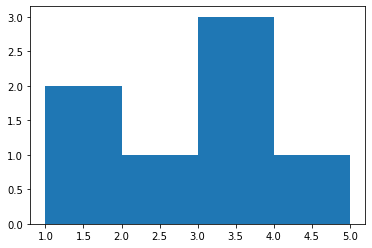

In [8]:
values = [1.1, 1.5, 2.2, 3.5, 3.5, 3.6, 4.1]
weights = [1., 1., 3., 1.2, 1.4, 1.1, 0.2]
plt.hist(values, bins=4, range=(1,5))
plt.show()

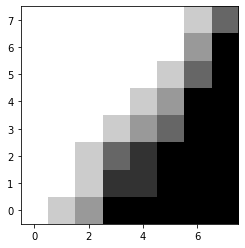

In [10]:
cell = np.array([
    [0, 1, 2, 5, 5, 5, 5, 5],
    [0, 0, 1, 4, 4, 5, 5, 5],
    [0, 0, 1, 3, 4, 5, 5, 5],
    [0, 0, 0, 1, 2, 3, 5, 5],
    [0, 0, 0, 0, 1, 2, 5, 5],
    [0, 0, 0, 0, 0, 1, 3, 5],
    [0, 0, 0, 0, 0, 0, 2, 5],
    [0, 0, 0, 0, 0, 0, 1, 3],
    ],dtype='float64')
plt.imshow(cell, cmap='binary', origin='lower')
plt.show()

In [11]:
gradx = cv2.Sobel(cell, cv2.CV_64F,1,0,ksize=1)
grady = cv2.Sobel(cell, cv2.CV_64F,0,1,ksize=1)

norm, angle = cv2.cartToPolar(gradx,grady,angleInDegrees=True)

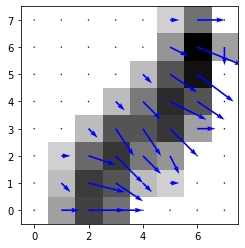

In [12]:
plt.imshow(norm, cmap='binary', origin='lower')

q = plt.quiver(gradx, grady, color='blue')
plt.show()

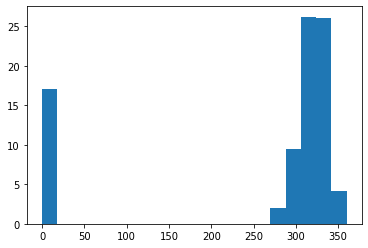

In [13]:
plt.hist(angle.reshape(-1), weights=norm.reshape(-1), bins=20, range=(0,360))
plt.show()

In [7]:
hog = cv2.HOGDescriptor()
hog.setSVMDetector(cv2.HOGDescriptor_getDefaultPeopleDetector())

In [5]:
videoPath = 'video.mp4'
cap = cv2.VideoCapture(videoPath)

ret= True
#read frame-by-frame
ret, frame = cap.read()

In [8]:
# resizing for faster detection
frame = cv2.resize(frame, (640, 480))
# using a greyscale picture, also for faster detection
gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

# detect people in the image
# returns the bounding boxes for the detected objects
boxes, weights = hog.detectMultiScale(frame, winStride=(8,8) )

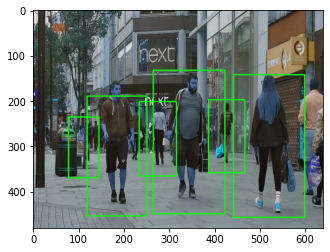

In [9]:
boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

for (xA, yA, xB, yB) in boxes:
    # display the detected boxes in the colour picture
    cv2.rectangle(frame, (xA, yA), (xB, yB),(0, 255, 0), 2)
frame = Image.fromarray(frame)
plt.imshow(frame)

KeyboardInterrupt: 

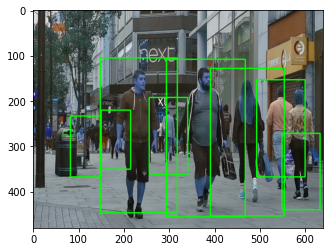

In [10]:
while(ret):
    # Capture frame-by-frame
    ret, frame = cap.read()

    # resizing for faster detection
    frame = cv2.resize(frame, (640, 480))
    # using a greyscale picture, also for faster detection
    gray = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)

    # detect people in the image
    # returns the bounding boxes for the detected objects
    boxes, weights = hog.detectMultiScale(frame, winStride=(8,8) )

    boxes = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])

    for (xA, yA, xB, yB) in boxes:
        # display the detected boxes in the colour picture
        cv2.rectangle(frame, (xA, yA), (xB, yB),
                          (0, 255, 0), 2)
    frame = Image.fromarray(frame)
    plt.imshow(frame)
    display.clear_output(wait=True)
    display.display(plt.gcf())

# When everything is done, release the capture
cap.release()
